In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, f1_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# URL of the ARFF dataset
url = 'DataSet/Training.arff'

# Load ARFF file into a pandas DataFrame
data, meta= arff.loadarff(url)
imp = pd.DataFrame(data)

In [3]:
df = imp.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [4]:
#Create x and y variables.
X = df.iloc[:,:-1].values #data without target
y = df.iloc[:,-1].values.reshape(-1,1) #target

print("Number of observations and dimensions for Features:", X.shape)
print("Number of observations for Target:", y.shape)

Number of observations and dimensions for Features: (11055, 30)
Number of observations for Target: (11055, 1)


In [5]:
round(df.describe(),3)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,...,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000,11055.000
mean,0.314,-0.633,0.739,0.701,0.741,-0.735,0.064,0.251,-0.337,0.629,...,0.613,0.817,0.061,0.377,0.287,-0.484,0.722,0.344,0.720,0.114
std,0.950,0.766,0.674,0.714,0.671,0.678,0.818,0.912,0.942,0.778,...,0.790,0.577,0.998,0.926,0.828,0.875,0.692,0.570,0.694,0.994
min,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
25%,-1.000,-1.000,1.000,1.000,1.000,-1.000,-1.000,-1.000,-1.000,1.000,...,1.000,1.000,-1.000,-1.000,0.000,-1.000,1.000,0.000,1.000,-1.000
50%,1.000,-1.000,1.000,1.000,1.000,-1.000,0.000,1.000,-1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,-1.000,1.000,0.000,1.000,1.000
75%,1.000,-1.000,1.000,1.000,1.000,-1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


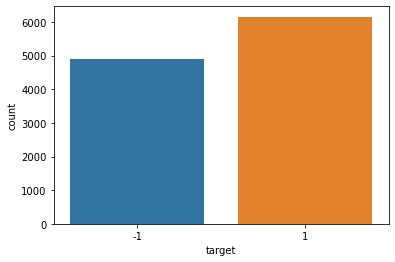

In [6]:
# Convert NumPy arrays to pandas DataFrame
data = pd.DataFrame(data=X)  # Replace 'feature1', 'feature2', ... with actual feature names
data['target'] = y  # Assuming y represents the target variable

# Plot countplot using seaborn
sns.countplot(data['target'])
plt.show()

<AxesSubplot:>

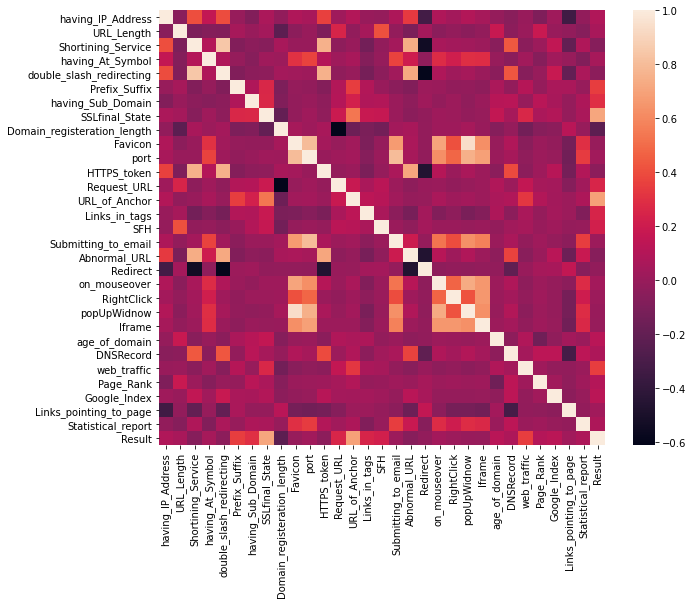

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,color='blue')

# Perceptron

In [8]:
from perceptron import Perceptron

perceptron = Perceptron(num_features=X.shape[1])

perceptron.fit(X, y)

In [9]:
def calc_accuracy(model, X, y):
    predictions = [model.predict(x) for x in X]
    accuracy = np.mean(predictions == y)
    return accuracy

In [10]:
# Calculate accuracy on the training set
accuracy = calc_accuracy(perceptron, X, y)
print(f"Accuracy: {accuracy *100:.2f}%")

Accuracy: 88.74%


# Finetune the hyperparameters of Perceptron algorithm

In [11]:
def train_val_test_split(X, y, val_ratio=0.1, test_ratio=0.1, random_seed=42):
    np.random.seed(random_seed)
    total_samples = len(y)
    val_size = int(total_samples * val_ratio)
    test_size = int(total_samples * test_ratio)
    
    indices = np.arange(total_samples)
    np.random.shuffle(indices)
    
    val_indices = indices[:val_size]
    test_indices = indices[val_size:(val_size + test_size)]
    train_indices = indices[(val_size + test_size):]
    
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [13]:
# Usage example assuming X and y are NumPy arrays
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X, y)

# Hyperparameter tuning using grid search
best_accuracy = 0
best_learning_rate = 0
best_max_iter = 0

# Define hyperparameters to tune
learning_rates = [0.0001, 0.001, 0.01, 0.1]
max_iter_values = [100, 150, 200, 500]

# Grid search
for learning_rate in learning_rates:
    for max_iter in max_iter_values:
        perceptron = Perceptron(X.shape[1], learning_rate=learning_rate, max_iter=max_iter)
        perceptron.fit(X_train, y_train)
        
        # Calculate accuracy on the validation set
        accuracy = calc_accuracy(perceptron, X_test, y_test)
                
        # Update best hyperparameters if the current model performs better on the validation set
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_learning_rate = learning_rate
            best_max_iter = max_iter

# Train the final model using the best hyperparameters
final_perceptron = Perceptron(X.shape[1],learning_rate=best_learning_rate, max_iter=best_max_iter)
final_perceptron.fit(X_train, y_train)

# Evaluate the final model on the test set
print(f"Best Hyperparameters - Learning Rate: {best_learning_rate}, Max Number of Iteration: {best_max_iter}")
accuracy = calc_accuracy(final_perceptron, X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}")

Best Hyperparameters - Learning Rate: 0.0001, Max Number of Iteration: 100
Accuracy: 90.86


# Function for Evaluation Metrics

In [14]:
def evaluate(y_true, y_pred, confusion_matrix_title):
    
    # Calculate Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate F-score
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    
    #Plot confusion matrix    
    fig, axis1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
    fig.subplots_adjust(wspace=1)
    sns.heatmap(conf_matrix, cmap="twilight", annot=True, ax=axis1, fmt='.2f')
    axis1.set_title(confusion_matrix_title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [15]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the model
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Finetune Perceptron with 10-fold cross-validation

In [16]:
# Create 10-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
# Create a Perceptron instance
perceptron = Perceptron(num_features=X_train.shape[1])

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 150, 200, 500]
}

# Perform grid search with cross-validation
Perceptron_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=kfold, 
                           scoring=make_scorer(accuracy_score))

# Fit the grid search to your data
Perceptron_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", Perceptron_search.best_params_)
print("Best Accuracy: {:.2f}%".format(Perceptron_search.best_score_*100))

Best Parameters:  {'learning_rate': 0.001, 'max_iter': 150}
Best Accuracy: 91.18%


Accuracy: 0.89
F1 Score: 0.89
ROC AUC: 0.89


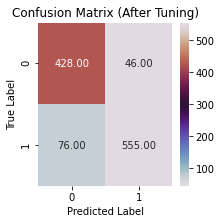

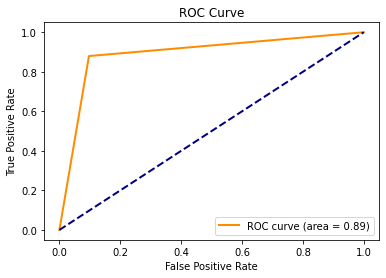

In [18]:
best_fit = Perceptron_search.fit(X_train, y_train)

# Perform cross-validation using cross_val_predict for prediction
perceptron_best_predictions = best_fit.predict(X_test)

evaluate(y_test, perceptron_best_predictions, "Confusion Matrix (After Tuning)")
plot_roc_curve(y_test, perceptron_best_predictions)

# Decision Tree

Accuracy: 0.96
F1 Score: 0.96
ROC AUC: 0.96


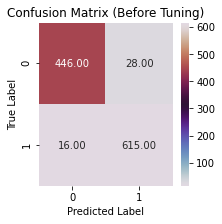

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
Best parameters found: {'max_depth': 26, 'min_samples_leaf': 1}
Accuracy: 0.96
F1 Score: 0.96
ROC AUC: 0.96


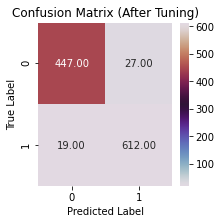

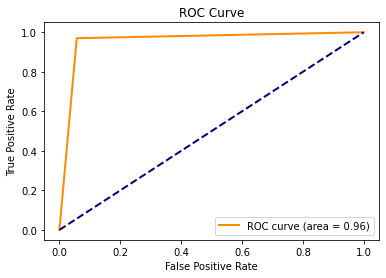

In [19]:
#Create Decision Tree Object.
DT = DecisionTreeClassifier()

#Training the model.
DT.fit(X_train, y_train)

#Predict test data set.
y_pred_DT = DT.predict(X_test)

#Checking performance of model
evaluate(y_test, y_pred_DT, "Confusion Matrix (Before Tuning)")

params_DT = {'max_depth': range(32),
            'min_samples_leaf': range(10)}

#Create new Neural Network object
DT2 = DecisionTreeClassifier()

#Use GridSearch
DT_search = GridSearchCV(DT2, params_DT, scoring="accuracy", cv=kfold, verbose=5, n_jobs=-1)

#Fit the model
best_DT = DT_search.fit(X_train,y_train)

print('Best parameters found:', best_DT.best_params_)

DT_best_predictions = best_DT.predict(X_test)

evaluate(y_test, DT_best_predictions, "Confusion Matrix (After Tuning)")

plot_roc_curve(y_test, DT_best_predictions)

# Neural Network

Accuracy: 0.96
F1 Score: 0.96
ROC AUC: 0.96


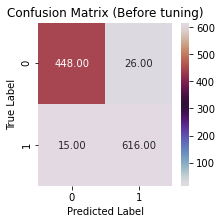

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'learning_rate_init': 0.001, 'max_iter': 500}
Accuracy: 0.96
F1 Score: 0.96
ROC AUC: 0.95


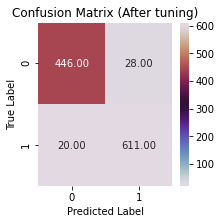

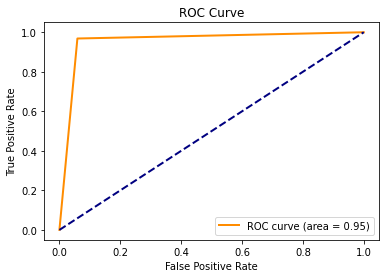

In [20]:
np.random.seed(868)
#Create Neural Network Object.
Neural_Network = MLPClassifier()

#Training the model. 
Neural_Network.fit(X_train, y_train)

#Predict test data set.
y_pred_NN = Neural_Network.predict(X_test)

#Checking performance of model
evaluate(y_test, y_pred_NN, 'Confusion Matrix (Before tuning)')

params_NN = {
    'activation': ["relu", "sigmoid", "tanh", "softmax"],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 150, 200, 500]
}

#Create new Neural Network object
Neural_Network2 = MLPClassifier()

#Use GridSearch
NN_search = GridSearchCV(Neural_Network2, params_NN, cv=kfold, verbose=1, n_jobs=-1)

#Fit the model
best_NN = NN_search.fit(X_train,y_train)

print('Best parameters found:', best_NN.best_params_)

NN_best_prediction = best_NN.predict(X_test)

#Checking performance of model
evaluate(y_test, NN_best_prediction, 'Confusion Matrix (After tuning)')

# Assuming y_test contains true labels and y_pred_prob contains predicted probabilities for class 1
plot_roc_curve(y_test, NN_best_prediction)

# Naïve Bayes

Accuracy: 0.90
F1 Score: 0.90
ROC AUC: 0.89


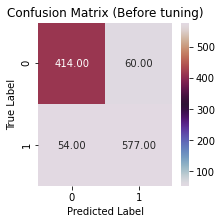

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best parameters found: {'alpha': 0.0001}
Best score found: 0.9076298028989953
Accuracy: 0.90
F1 Score: 0.90
ROC AUC: 0.89


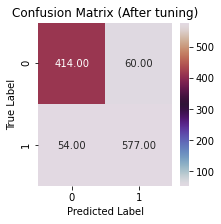

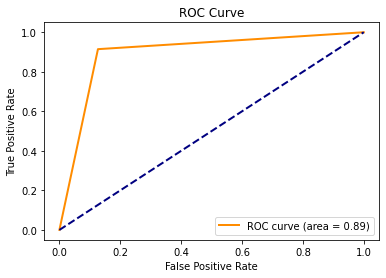

In [21]:
# Initialize the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Assuming you have a test dataset X_test
predictions = nb_classifier.predict(X_test)

#Checking performance of model
evaluate(y_test, predictions, 'Confusion Matrix (Before tuning)')

params_NB = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]  # Example values for the alpha parameter
}

#Create new NB object
NB2 = BernoulliNB()

#Use GridSearch
NB_search = GridSearchCV(NB2, params_NB, cv=kfold,verbose=1, n_jobs=-1,scoring='accuracy')

#Fit the model
best_NB = NB_search.fit(X_train,y_train)

print('Best parameters found:', best_NB.best_params_)
print('Best score found:', best_NB.best_score_)
 
NB_best_prediction = best_NB.predict(X_test)

#Checking performance of model
evaluate(y_test, NB_best_prediction, 'Confusion Matrix (After tuning)')

plot_roc_curve(y_test, NB_best_prediction)

# K-Nearest Neighbours

Accuracy: 0.93
F1 Score: 0.93
ROC AUC: 0.93


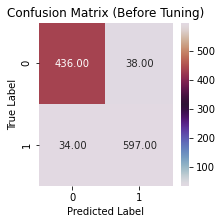

Best Hyperparameters: {'k': 1}
Accuracy: 0.95
F1 Score: 0.95
ROC AUC: 0.94


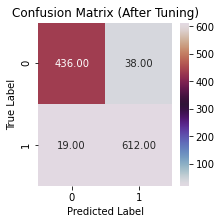

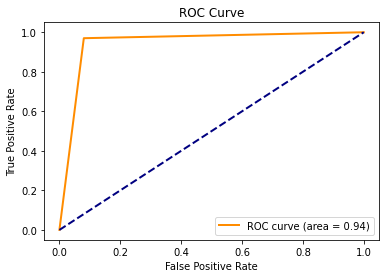

In [22]:
from knn import KNNClassifier

# Instantiate and fit KNN classifier
knn = KNNClassifier()
knn.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = knn.predict(X_test)
evaluate(y_test, predictions, "Confusion Matrix (Before Tuning)")

# Define the parameter grid for GridSearch
param_grid = {
    'k': range(10)
}

# Create KNNClassifier instance
knn2 = KNNClassifier()

# Create GridSearchCV instance with 10-fold cross-validation
knn_search = GridSearchCV(knn2, param_grid, cv=kfold, scoring='accuracy')

# Perform GridSearchCV
knn_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", knn_search.best_params_)

# Evaluate the best model using evaluation metrics
best_knn = knn_search.best_estimator_
best_prediction_knn = best_knn.predict(X_test)

evaluate(y_test, best_prediction_knn, "Confusion Matrix (After Tuning)")
plot_roc_curve(y_test, best_prediction_knn)